<h1>Linear regression exercise</h1>

<h2>Imports</h2>

In [2140]:
# Here is imports for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)

In [2141]:
# Save the data into a dataframe
csv_path = "laptopData.csv"
df = pd.read_csv(csv_path)

<h3>Insights into the dataframe</h3>

In [2142]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1273.0,652.674784,376.493027,0.00,327.00,652.00,980.0000,1302.00
Price,1273.0,59955.814073,37332.251005,9270.72,31914.72,52161.12,79333.3872,324954.72


In [2144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [2145]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [2146]:
# Drop the unnamed: 0 column since it seems to just be some type of a index column 
df = df.drop(columns="Unnamed: 0", axis=1)

In [2147]:
df["Company"].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [2148]:
df["TypeName"].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [2149]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

<h3>Checking for missing values</h3>

In [2150]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [2151]:
# Create a new DataFrame with only rows containing missing values within any variables
isna_df = df[df.isna().any(axis=1)]

# Display the rows with missing values with the new DataFrame created for them
isna_df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Optimizing data for basic visualization</h3>

In [2152]:
# Display the Memory value counts to see all the different memory types
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

In [2153]:
# Split Memory into two parts if there are multiple storage types
df[["Primary_Storage", "Secondary_Storage"]] = df["Memory"].str.split(" \+ ", expand=True, n=1)

# Display the Primary_Storage value counts to see all the different primary storage types
df['Primary_Storage'].value_counts()

Primary_Storage
256GB SSD              487
1TB HDD                218
128GB SSD              168
512GB SSD              136
500GB HDD              130
32GB Flash Storage      37
2TB HDD                 16
1TB SSD                 15
64GB Flash Storage      15
1.0TB Hybrid             9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
128GB Flash Storage      4
180GB SSD                4
16GB SSD                 3
512GB Flash Storage      2
64GB SSD                 1
32GB HDD                 1
?                        1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
1.0TB HDD                1
Name: count, dtype: int64

In [2154]:
# Display the row with Memory with value ?
df.loc[df['Memory'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,?,None


In [2155]:
# Display the Secondary_Storage value counts to see all the different primary storage types
df['Secondary_Storage'].value_counts()

Secondary_Storage
1TB HDD         181
2TB HDD          15
256GB SSD         3
500GB HDD         2
1.0TB Hybrid      2
512GB SSD         1
Name: count, dtype: int64

In [2156]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None


In [2157]:
# Function to check if storage contains TB or GB and convert size accordingly
def convert_storage_to_gb(storage):
    if pd.notna(storage):  # Ensure storage is not NaN
        if "TB" in storage:
            size = float(storage.split("TB")[0].strip()) * 1024  # Convert TB to GB
            return size
        elif "GB" in storage:
            size = float(storage.split("GB")[0].strip())  # Keep GB as is
            return size
    return 0  # Default for missing values

# Apply conversion to Primary and Secondary Storage
df["Primary_Size(GB)"] = df["Primary_Storage"].apply(convert_storage_to_gb)
df["Secondary_Size(GB)"] = df["Secondary_Storage"].apply(convert_storage_to_gb)

In [2158]:
df['Primary_Size(GB)'].value_counts()

Primary_Size(GB)
256.0     495
1024.0    243
128.0     173
512.0     138
500.0     130
32.0       44
0.0        31
64.0       16
2048.0     16
16.0       10
180.0       4
240.0       1
8.0         1
508.0       1
Name: count, dtype: int64

In [2159]:
df['Secondary_Size(GB)'].value_counts()

Secondary_Size(GB)
0.0       1099
1024.0     183
2048.0      15
256.0        3
500.0        2
512.0        1
Name: count, dtype: int64

In [2160]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None,256.0,0.0


In [2161]:
df = df.drop(columns=['Memory'], axis=1)
df.rename(columns={"Inches": "ScreenSize"}, inplace=True)


In [2162]:
df.head()

,Company,TypeName,ScreenSize,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None,256.0,0.0


In [2163]:
# Extract numeric values before converting to float
df["Weight"] = df["Weight"].str.extract(r"(\d+\.?\d*)").astype(float)
df["Ram"] = df["Ram"].str.extract(r"(\d+)").astype(float)
df["ScreenSize"] = df["ScreenSize"].str.extract(r"(\d+)").astype(float)

Basic Visualization


<Axes: >

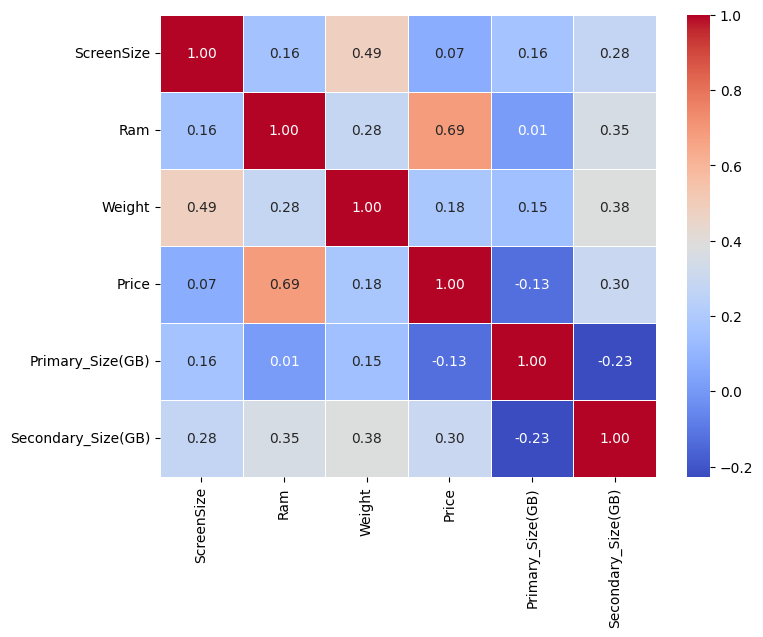

In [2164]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


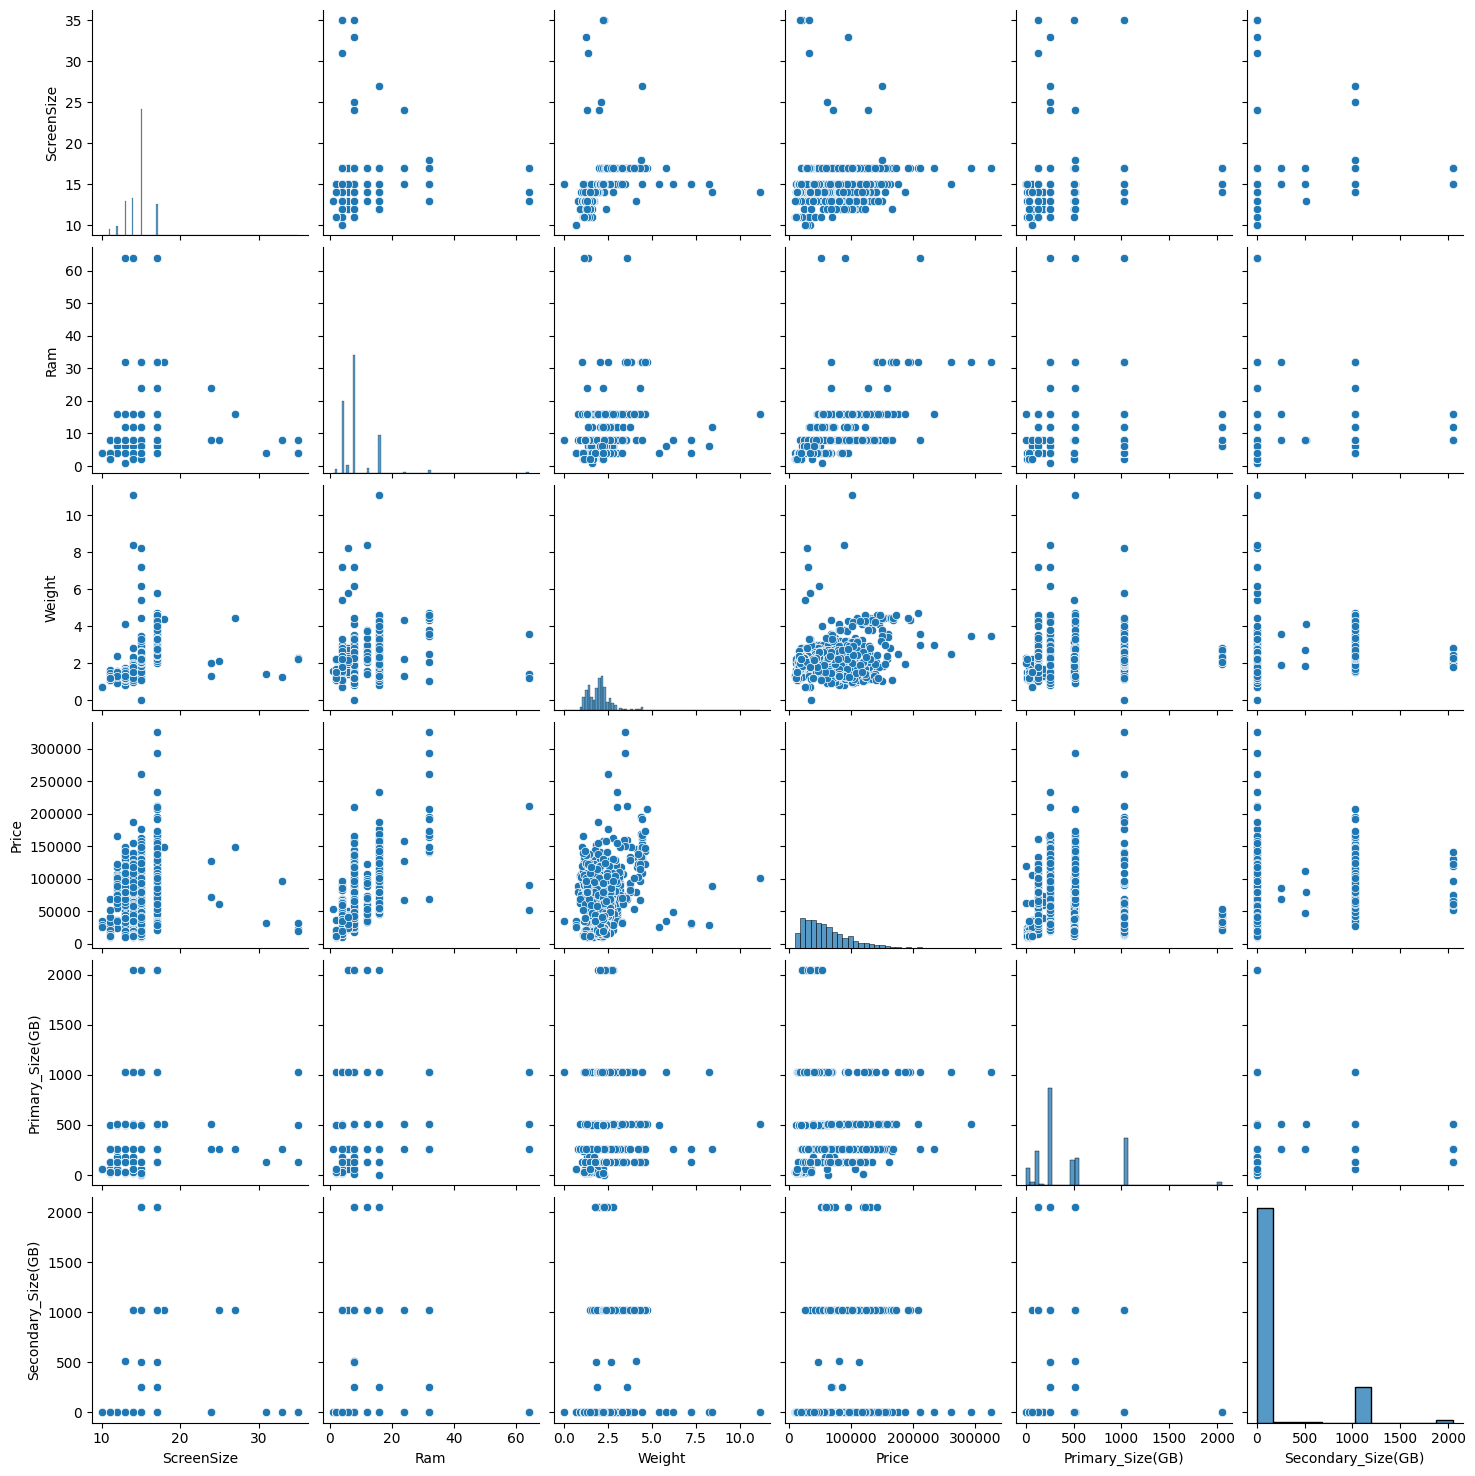

In [2165]:
# pair plot to see everything at once
sns.pairplot(df_numeric)

# Nothing seems to correlate that well with price, this could be because of companies brand value or other possible factors like model name excetra

Optimization for machine learning

In [2167]:
# Convert Company column into binary columns
for company in df["Company"].unique():
    df[company] = (df["Company"] == company).astype(int)

# Drop the original Company column if needed
df.drop(columns=["Company"], inplace=True)

In [2168]:
# Convert Company column into binary columns
for company in df["TypeName"].unique():
    df[company] = (df["TypeName"] == company).astype(int)

# Drop the original Company column if needed
df.drop(columns=["TypeName"], inplace=True)

In [2169]:
# Convert Company column into binary columns
for company in df["Cpu"].unique():
    df[company] = (df["Cpu"] == company).astype(int)

# Drop the original Company column if needed
df.drop(columns=["Cpu"], inplace=True)

In [2170]:
# Convert Company column into binary columns
for company in df["ScreenResolution"].unique():
    df[company] = (df["ScreenResolution"] == company).astype(int)

# Drop the original Company column if needed
df.drop(columns=["ScreenResolution"], inplace=True)

In [2171]:
# Convert Company column into binary columns
for company in df["Gpu"].unique():
    df[company] = (df["Gpu"] == company).astype(int)

# Drop the original Company column if needed
df.drop(columns=["Gpu"], inplace=True)

In [2172]:
# Convert Company column into binary columns
for company in df["OpSys"].unique():
    df[company] = (df["OpSys"] == company).astype(int)

# Drop the original Company column if needed
df.drop(columns=["OpSys"], inplace=True)

In [2173]:
df.head()

,ScreenSize,Ram,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Apple,HP,Acer,Asus,Dell,Lenovo,NaN,Chuwi,MSI,Microsoft,Toshiba,Huawei,Xiaomi,Vero,Razer,Mediacom,Samsung,Google,Fujitsu,LG,Ultrabook,Notebook,Gaming,2 in 1 Convertible,Workstation,Netbook,Intel Core i5 2.3GHz,Intel Core i5 1.8GHz,Intel Core i5 7200U 2.5GHz,Intel Core i7 2.7GHz,Intel Core i5 3.1GHz,AMD A9-Series 9420 3GHz,Intel Core i7 2.2GHz,Intel Core i7 8550U 1.8GHz,Intel Core i5 8250U 1.6GHz,Intel Core i3 6006U 2GHz,Intel Core i7 2.8GHz,Intel Core M m3 1.2GHz,Intel Core i7 7500U 2.7GHz,Intel Core i7 2.9GHz,Intel Core i3 7100U 2.4GHz,Intel Core i5 7300HQ 2.5GHz,AMD E-Series E2-9000e 1.5GHz,Intel Core i5 1.6GHz,Intel Core i7 8650U 1.9GHz,Intel Atom x5-Z8300 1.44GHz,AMD E-Series E2-6110 1.5GHz,AMD A6-Series 9220 2.5GHz,Intel Celeron Dual Core N3350 1.1GHz,Intel Core i3 7130U 2.7GHz,Intel Core i7 7700HQ 2.8GHz,Intel Core i5 2.0GHz,AMD Ryzen 1700 3GHz,Intel Pentium Quad Core N4200 1.1GHz,Intel Celeron Dual Core N3060 1.6GHz,Intel Core i5 1.3GHz,AMD FX 9830P 3GHz,Intel Core i7 7560U 2.4GHz,AMD E-Series 6110 1.5GHz,Intel Core i5 6200U 2.3GHz,Intel Core M 6Y75 1.2GHz,Intel Core i5 7500U 2.7GHz,Intel Core i3 6006U 2.2GHz,AMD A6-Series 9220 2.9GHz,Intel Core i7 6920HQ 2.9GHz,Intel Core i5 7Y54 1.2GHz,Intel Core i7 7820HK 2.9GHz,Intel Xeon E3-1505M V6 3GHz,Intel Core i7 6500U 2.5GHz,AMD E-Series 9000e 1.5GHz,AMD A10-Series A10-9620P 2.5GHz,AMD A6-Series A6-9220 2.5GHz,Intel Core i5 2.9GHz,Intel Core i7 6600U 2.6GHz,Intel Core i3 6006U 2.0GHz,Intel Celeron Dual Core 3205U 1.5GHz,Intel Core i7 7820HQ 2.9GHz,AMD A10-Series 9600P 2.4GHz,Intel Core i7 7600U 2.8GHz,AMD A8-Series 7410 2.2GHz,Intel Celeron Dual Core 3855U 1.6GHz,Intel Pentium Quad Core N3710 1.6GHz,AMD A12-Series 9720P 2.7GHz,Intel Core i5 7300U 2.6GHz,AMD A12-Series 9720P 3.6GHz,Intel Celeron Quad Core N3450 1.1GHz,Intel Celeron Dual Core N3060 1.60GHz,Intel Core i5 6440HQ 2.6GHz,Intel Core i7 6820HQ 2.7GHz,AMD Ryzen 1600 3.2GHz,Intel Core i7 7Y75 1.3GHz,Intel Core i5 7440HQ 2.8GHz,Intel Core i7 7660U 2.5GHz,Intel Core i7 7700HQ 2.7GHz,Intel Core M m3-7Y30 2.2GHz,Intel Core i5 7Y57 1.2GHz,Intel Core i7 6700HQ 2.6GHz,Intel Core i3 6100U 2.3GHz,Intel Atom x5-Z8350 1.44GHz,AMD A10-Series 9620P 2.5GHz,AMD E-Series 7110 1.8GHz,Intel Celeron Dual Core N3350 2.0GHz,AMD A9-Series A9-9420 3GHz,Intel Core i7 6820HK 2.7GHz,Intel Core M 7Y30 1.0GHz,Intel Xeon E3-1535M v6 3.1GHz,Intel Celeron Quad Core N3160 1.6GHz,Intel Core i5 6300U 2.4GHz,Intel Core i3 6100U 2.1GHz,AMD E-Series E2-9000 2.2GHz,Intel Celeron Dual Core N3050 1.6GHz,Intel Core M M3-6Y30 0.9GHz,AMD A9-Series 9420 2.9GHz,Intel Core i5 6300HQ 2.3GHz,AMD A6-Series 7310 2GHz,Intel Atom Z8350 1.92GHz,Intel Xeon E3-1535M v5 2.9GHz,Intel Core i5 6260U 1.8GHz,Intel Pentium Dual Core N4200 1.1GHz,Intel Celeron Quad Core N3710 1.6GHz,Intel Core M 1.2GHz,AMD A12-Series 9700P 2.5GHz,Intel Core i7 7500U 2.5GHz,Intel Pentium Dual Core 4405U 2.1GHz,AMD A4-Series 7210 2.2GHz,Intel Core i7 6560U 2.2GHz,Intel Core M m7-6Y75 1.2GHz,AMD FX 8800P 2.1GHz,Intel Core M M7-6Y75 1.2GHz,Intel Core i5 7200U 2.50GHz,Intel Core i5 7200U 2.70GHz,Intel Atom X5-Z8350 1.44GHz,Intel Core i5 7200U 2.7GHz,Intel Core M 1.1GHz,Intel Atom x5-Z8550 1.44GHz,Intel Pentium Dual Core 4405Y 1.5GHz,Intel Pentium Quad Core N3700 1.6GHz,Intel Core M 6Y54 1.1GHz,Intel Core i7 6500U 2.50GHz,Intel Celeron Dual Core N3350 2GHz,Samsung Cortex A72&A53 2.0GHz,AMD E-Series 9000 2.2GHz,Intel Core M 6Y30 0.9GHz,AMD A9-Series 9410 2.9GHz,IPS Panel Retina Display 2560x1600,1440x900,Full HD 1920x1080,IPS Panel Retina Display 2880x1800,1366x768,IPS Panel Full HD 1920x1080,IPS Panel Retina Display 2304x1440,IPS Panel Full HD / Touchscreen 1920x1080,Full HD / Touchscreen 1920x1080,Touchscreen / Quad HD+ 3200x1800,Touchscreen 2256x1504,Quad HD+ / Touchscreen 3200x1800,IPS Panel 1366x768,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,IPS Panel Full HD 2160x1440,4K Ultra HD / Touchscreen 3840x